#Detecting the anomalous activity of a ship’s engine

**Welcome to my first project: Detecting the anomalous activity of a ship’s engine!**

This project allows you to dive deep into a real-world challenge, applying and honing the data science skills you've been cultivating so far. In this immersive exploration into detecting the anomalous activity of a ship’s engine, you can practically apply the concepts you've learned over the past few weeks.

A poorly maintained ship engine in the supply chain industry can lead to inefficiencies, increased fuel consumption, higher risks of malfunctions, and potential safety hazards. Your challenge in this project is to apply critical thinking and ML concepts to design and implement a robust anomaly detection model.

<br></br>

## **Business context**
You are provided with a real data set to identify anomalous activity in a ship’s engine functionality (Devabrat,  2022). As you work through this project, keep in mind that, typically speaking, anomalies would make up a minority of the data points (i.e., about 1% to 5% of the data points would be anomalies).

The data set contains six important features continuously monitored to evaluate the engine's status as ‘good’ or ‘bad’. These features are:
- **Engine rpm (revolutions per minute):** A high rpm indicates the engine is operating at a higher speed than designed for prolonged periods, which can lead to overheating, excessive wear, and eventual failure. A low rpm could signal a lack of power, issues with fuel delivery, or internal mechanical problems.
- **Lubrication oil pressure:** Low lubrication oil pressure indicates insufficient lubrication, leading to increased friction, overheating, and engine damage. A high lubrication oil pressure could signal a blockage in the oil delivery system, potentially causing seal or gasket failure.
- **Fuel pressure:** High fuel pressure can cause poor engine performance and incomplete combustion, indicating fuel pump or filter issues. A low fuel pressure may result in excessive fuel consumption, poor emissions, or damage to the fuel injectors.
- **Coolant pressure:** Low coolant pressure indicates a potential leak in the cooling system or a coolant pump failure, risking engine overheating. A high coolant pressure could be a sign of a blockage in the cooling system or a failing head gasket, which can also lead to overheating.
- **Lubrication oil temperature:** High lubrication oil temperature suggests the oil is overheating, which can degrade its lubricating properties and lead to engine damage. A low lubrication oil temperature may indicate it is not reaching its optimal operating temperature, potentially causing inadequate lubrication.
- **Coolant temperature:** High coolant temperature signals overheating, which various issues, including a failed thermostat, coolant leak, or insufficient coolant flow can cause. A low coolant temperature could suggest the engine is not reaching its optimal operating temperature, affecting performance and efficiency.

Issues with engines could lead to engine malfunctions, potential safety hazards, and downtime (e.g. delayed deliveries), resulting in the breakdown of a ship’s overall functionality, consequently impacting the business, such as affecting revenue via failure to deliver goods. By predicting timely maintenance, the business aims to increase profit by reducing downtime, reducing safety risks for the crew, limiting fuel consumption, and increasing customer satisfaction through timely deliveries.

Your task is to develop a robust anomaly detection system to protect a company’s shipping fleet by evaluating engine functionality. Therefore, you’ll explore the data and:
- employ preprocessing and feature engineering
- perform anomaly detection.

You must prepare a report illustrating your insights to the prospective stakeholders, showing how your solution will save the business money and build trust with its stakeholders. At this stage of the project, the main question you need to consider is:
- What insights can be gained from the data, and what recommendations can be made to the company based on these insights? For example, which features need to be monitored closely, and what are the thresholds for anomalous observations? Which statistical or ML technique is the best for anomaly detection based on **this data set**, and which feature (univariate approach) or combination of features (multivariate approach) can predict maintenance?

<br></br>

> **Disclaimer**
>
> Please note that although a real-life data set was provided, the business context in this project is fictitious. Any resemblance to companies and persons (living or dead) is coincidental. The information in the data sets is provided on an 'as is' basis with no guarantees of completeness, accuracy, usefulness, or timeliness.

<br></br>

## **Objective**
By the end of this project, you will be able to understand and apply statistical and ML methods for detecting anomalies.

In the Notebook, you will:
- explore the data set
- preprocess the data and conduct feature engineering
- apply statistical techniques to detect anomalies
- use ML algorithms to detect anomalies.

### Initial data exploration and assessment

In [ ]:
#Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rich.console import Console

console = Console()

#Step 1: Import the data with a url link from GitHub
url = 'https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/engine.csv'
df = pd.read_csv(url)

#Step 2: View DataFrame
print(df.shape)
df.head()

(19535, 6)


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,682,2.391656,4.617196,2.848982,76.272417,69.884609
1,605,5.466877,6.424361,5.727520,73.222679,74.907314
2,658,3.434232,3.680896,1.678708,88.089916,78.704806
3,749,2.094656,7.120927,1.639670,77.661625,82.386700
4,676,3.538228,5.956472,3.225336,75.226352,67.153220


In [ ]:
#Step 2: Determine metadata of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 915.8 KB


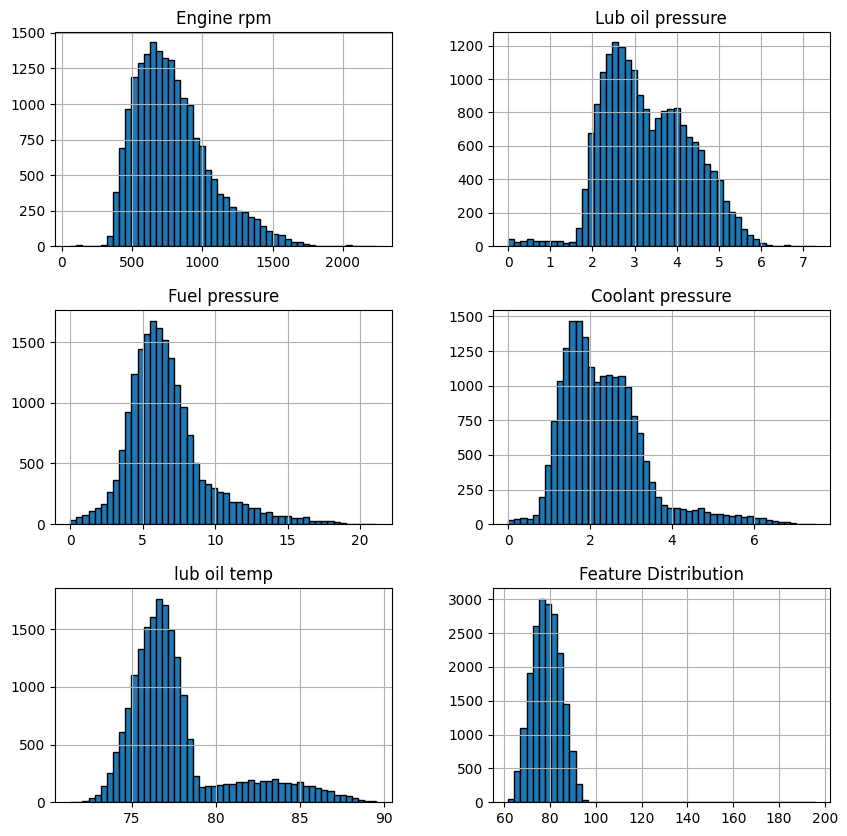

Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
dtype: int64
Duplicate Rows:  0


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
count,19535.00,19535.00,19535.00,19535.00,19535.00,19535.00
mean,791.24,3.30,6.66,2.34,77.64,78.43
std,267.61,1.02,2.76,1.04,3.11,6.21
min,61.00,0.00,0.00,0.00,71.32,61.67
25%,593.00,2.52,4.92,1.60,75.73,73.90
50%,746.00,3.16,6.20,2.17,76.82,78.35
75%,934.00,4.06,7.74,2.85,78.07,82.92
95%,1324.00,5.06,12.21,4.44,84.94,88.61
max,2239.00,7.27,21.14,7.48,89.58,195.53


In [ ]:
#Exploratory Data Analysis

#Step 2: Histogram (distribution of features)
df.hist(figsize=(10,10), bins=50, edgecolor='black')
plt.title("Feature Distribution")
plt.show()

#Step 2: Check missing values and duplicate rows
print(df.isnull().sum())
print("Duplicate Rows: ", df.duplicated().sum())

#Step 3 : Generate descriptive statistics of data: Mean//Median/Identify 95th percentile of atleast two features
df.describe(percentiles=[.25, .50, .75, .95]).round(2)

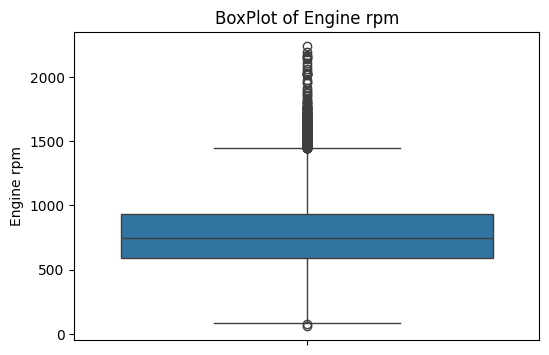

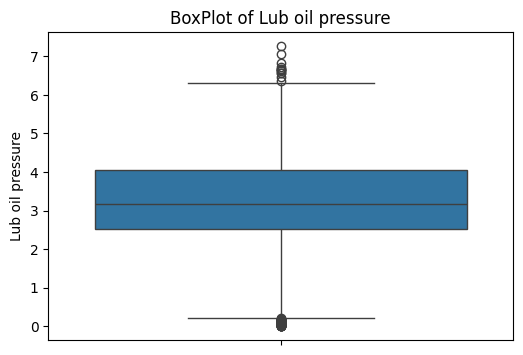

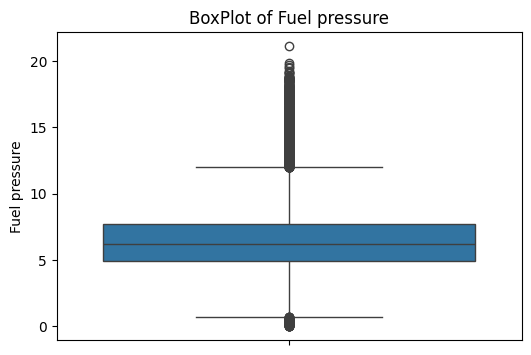

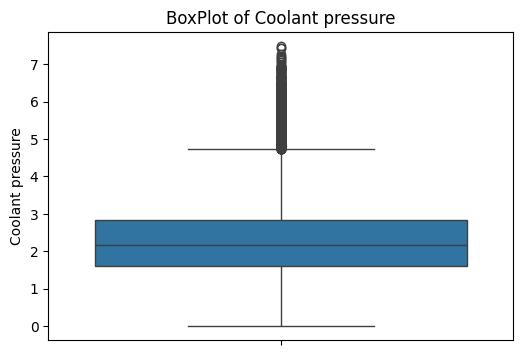

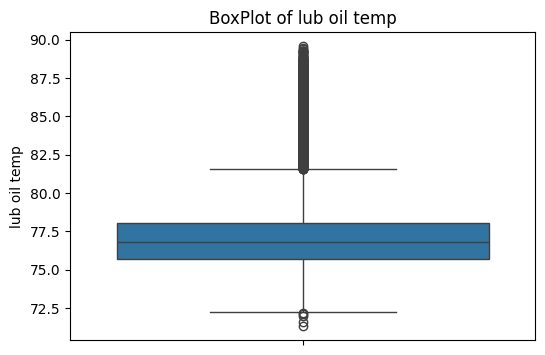

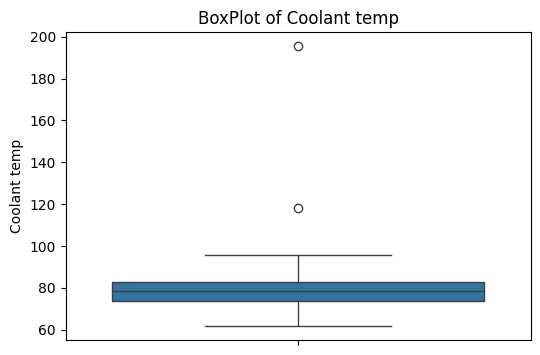

In [ ]:
#Step 4: Visualise the data to determine the distribution and extreme values

#BoxPlot to spot extreme values
for col in df.columns:
  plt.figure(figsize=(6,4))
  sns.boxplot(y=df[col])
  plt.title(f"BoxPlot of {col}")
  plt.show()

### Anomaly detection: Statistical methods

In [ ]:
#Method to calculate outliers for each feature
def iqr_outlier(df):
  df_iqr = df.copy()
  for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    new_col = f"{col}_flagged"
    df_iqr[new_col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), 1, 0)
  return df_iqr

#Create a new dataframe by calling iqr_outlier, with new columns for each feature to distinguish outliers
df_iqr_engine_data = iqr_outlier(df)
df_iqr_engine_data.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine rpm_flagged,Lub oil pressure_flagged,Fuel pressure_flagged,Coolant pressure_flagged,lub oil temp_flagged,Coolant temp_flagged
0,682,2.391656,4.617196,2.848982,76.272417,69.884609,0,0,0,0,0,0
1,605,5.466877,6.424361,5.727520,73.222679,74.907314,0,0,0,1,0,0
2,658,3.434232,3.680896,1.678708,88.089916,78.704806,0,0,0,0,1,0
3,749,2.094656,7.120927,1.639670,77.661625,82.386700,0,0,0,0,0,0
4,676,3.538228,5.956472,3.225336,75.226352,67.153220,0,0,0,0,0,0


In [ ]:
#Identifying number of features that must simultaneously be in outlier condition,
#in order for a sample to be classified as an outlier,
#such that the total percentage of samples identified as outliers falls within the 1-5% range.

total_count = df_iqr_engine_data.shape[0]

#method to use different number of features and check which parameter gives best results
def calculate_iqr_prediction(data_df, no_of_cols):

  console.print("Below results are for ",no_of_cols, " feature simultaneously in outlier condition", style="bold")
  console.print("________________________________________________________________________________")

  data_df["IQR_prediction"] = (data_df.iloc[:, 6:11].sum(axis=1) >= no_of_cols).astype(int)
  feature_count = (data_df["IQR_prediction"] == 1).sum()
  console.print("Number of Anomalies: ", feature_count)

  #calculate percentage
  percentage_feature = (feature_count/total_count) * 100
  console.print("Percentage : ",percentage_feature.round(2))

In [ ]:
#Execute IQR calculation for different number of features

calculate_iqr_prediction(df_iqr_engine_data, 1)
calculate_iqr_prediction(df_iqr_engine_data, 2)
calculate_iqr_prediction(df_iqr_engine_data, 3)
calculate_iqr_prediction(df_iqr_engine_data, 4)
calculate_iqr_prediction(df_iqr_engine_data, 5)
calculate_iqr_prediction(df_iqr_engine_data, 6)

Below results are for  1  feature simultaneously in outlier condition

________________________________________________________________________________

Number of Anomalies:  4634

Percentage :  23.72

Below results are for  2  feature simultaneously in outlier condition

________________________________________________________________________________

Number of Anomalies:  422

Percentage :  2.16

Below results are for  3  feature simultaneously in outlier condition

________________________________________________________________________________

Number of Anomalies:  11

Percentage :  0.06

Below results are for  4  feature simultaneously in outlier condition

________________________________________________________________________________

Number of Anomalies:  0

Percentage :  0.0

Below results are for  5  feature simultaneously in outlier condition

________________________________________________________________________________

Number of Anomalies:  0

Percentage :  0.0

Below results are for  6  feature simultaneously in outlier condition

________________________________________________________________________________

Number of Anomalies:  0

Percentage :  0.0

**Thoughts & observations:** 1-5% of 19535 means the range for observations will be between 195 to 977. Looking at the above results, a good number of features that contain outlier observations within the expected 1-5% outliers is 2 features.

In [ ]:
#Fetch anomalies where minimum 2 features are simultaneously in outlier condition

df_iqr_engine_data["IQR_prediction"] = (df_iqr_engine_data.iloc[:, 6:11].sum(axis=1) >= 2).astype(int)

cols_to_check = df_iqr_engine_data.iloc[:, 6:11]
anomalies = df_iqr_engine_data[cols_to_check.sum(axis=1) >= 2]

anomalies.head(422)

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine rpm_flagged,Lub oil pressure_flagged,Fuel pressure_flagged,Coolant pressure_flagged,lub oil temp_flagged,Coolant temp_flagged,IQR_prediction
113,1495,3.276230,3.714396,2.495264,85.053243,75.743004,1,0,0,0,1,0,1
122,1454,2.063374,6.168260,1.260121,83.372256,82.718247,1,0,0,0,1,0,1
131,830,3.231908,13.479172,2.568096,87.480362,73.428213,0,0,1,0,1,0,1
144,1762,1.697487,4.327845,2.523372,86.750349,82.393211,1,0,0,0,1,0,1
148,1494,2.443220,3.548139,1.953403,82.234541,83.953914,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19236,771,1.816642,12.071438,2.303487,84.841115,85.694634,0,0,1,0,1,0,1
19306,944,4.198864,5.088806,4.759353,84.348972,86.904694,0,0,0,1,1,0,1
19328,771,3.916701,5.136610,5.592643,85.757119,69.278462,0,0,0,1,1,0,1
19343,1475,2.184002,6.558549,1.265442,84.933480,88.088609,1,0,0,0,1,0,1


Given the requirement that anomalies should fall within a range of 1–5% of the data, the results show that:


*   More than 3 features rarely satisfied the outlier condition together, resulting in very few anomalies
*   The best balance occurred when **2 features simultaneously satisfied the outlier condition**, leading to **422 anomalies**, which represents **2.16% of the dataset**.

By combining anomaly conditions across mutliple features, we avoid overestimating false positives from single-variable noise, while still maintaining sensitivity to realistic fault conditions.



### Anomaly Detection: Machine Learning (ML) models
### One Class SVM + PCA

In [ ]:
from sklearn  import svm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Scale data for better SVM Performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, 0:6])

print(X_scaled)

[[-0.40821185 -0.89281929 -0.73830371  0.49559555 -0.44070891 -1.37641176]
 [-0.69595007  2.11733175 -0.08375911  3.27315389 -1.42104681 -0.56715821]
 [-0.49789649  0.12769669 -1.07742594 -0.63362488  3.35802552  0.04469003]
 ...
 [-0.65484461  0.00614053 -1.03874489  3.53706979 -0.56369786 -1.00013427]
 [ 1.38921787 -0.55994531 -1.06920452  0.59469502 -0.27605939  0.47895143]
 [-0.35963266 -0.77199786 -0.10871387  0.34080808 -0.02812746 -1.17155345]]


In [ ]:
def calculate_one_class_svm(nu_value, gamma_value):
  X_scaled_1 = X_scaled.copy()

  #Use one class SVM method
  model = svm.OneClassSVM(nu=nu_value, kernel="rbf", gamma=gamma_value)
  model.fit(X_scaled_1)

  #Predict the class (normal or anomaly)
  y_pred = model.predict(X_scaled_1)
  print(y_pred)

  #Create Dataframe
  df_svm_model = pd.DataFrame(X_scaled, columns=df.columns[0:6])
  df_svm_model["y_pred"] = y_pred
  df_svm_model.head()

  #Return the outliers
  anomalies = df_svm_model[df_svm_model["y_pred"] == -1]

  return anomalies, y_pred


In [ ]:
#Test one-class SVM for different parameters
def test_one_class_svm_diff_parameters(nu_value, gamma_value):

  console.print("Below results for nu: ",nu_value," gamma: ",gamma_value, style="bold")
  console.print("---------------------------------------------------------------------------------------------")

  result_data = calculate_one_class_svm(nu_value, gamma_value)
  anomalies = result_data[0]
  y_pred = result_data[1]

  total_count = df.shape[0]
  percentage_for_result = (anomalies.shape[0]/total_count)*100

  print("Anomalies Count: ",anomalies.shape[0], " Percentage: ", percentage_for_result)

In [ ]:
test_one_class_svm_diff_parameters(0.01,0.5)
test_one_class_svm_diff_parameters(0.03,0.5)
test_one_class_svm_diff_parameters(0.05,0.5)
test_one_class_svm_diff_parameters(0.05,0.3)
test_one_class_svm_diff_parameters(0.05,0.1)

Below results for nu:  0.01  gamma:  0.5

---------------------------------------------------------------------------------------------

[1 1 1 ... 1 1 1]
Anomalies Count:  611  Percentage:  3.127719477860251


Below results for nu:  0.03  gamma:  0.5

---------------------------------------------------------------------------------------------

[1 1 1 ... 1 1 1]
Anomalies Count:  737  Percentage:  3.7727156385973895


Below results for nu:  0.05  gamma:  0.5

---------------------------------------------------------------------------------------------

[ 1 -1  1 ...  1  1  1]
Anomalies Count:  1043  Percentage:  5.339134886101869


Below results for nu:  0.05  gamma:  0.3

---------------------------------------------------------------------------------------------

[ 1 -1  1 ...  1  1  1]
Anomalies Count:  980  Percentage:  5.0166368057333


Below results for nu:  0.05  gamma:  0.1

---------------------------------------------------------------------------------------------

[ 1 -1  1 ...  1  1  1]
Anomalies Count:  978  Percentage:  5.006398771435884


**Thoughts & observations:** 1-5% of 19535 means the range for observations will be between 195 to 977. Looking at the above results, there isn't much difference in percentage by changing gamma parameter. The results closer to the given 1-5% (or percentage) is with parameters nu = 0.05 and gamma = 0.1

In [ ]:
result_data = calculate_one_class_svm(0.05,0.1)
anomalies_svm = result_data[0]
y_pred_svm = result_data[1]

result_data_1 = calculate_one_class_svm(0.03,0.5)
anomalies_svm_1 = result_data[0]
y_pred_svm_1 = result_data[1]

#Apply PCA for visualisation
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
print(X_pca)

[ 1 -1  1 ...  1  1  1]
[1 1 1 ... 1 1 1]
[[-0.55736171 -0.90651232]
 [-2.17717047 -1.20153816]
 [ 2.05180631  1.03958148]
 ...
 [-0.83238302 -2.1592666 ]
 [ 1.12628638 -0.05147268]
 [-0.50236925 -0.58087528]]


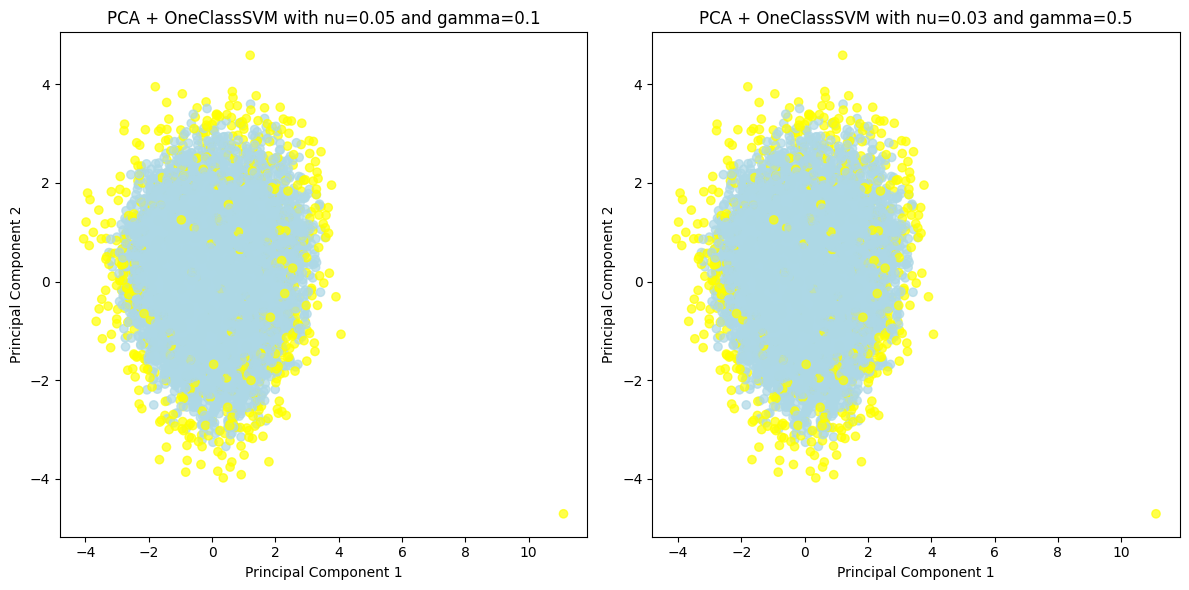

In [ ]:
#Visualise the output in 2D after performing PCA
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

plot_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
plot_df["anomaly"] = y_pred_svm

axes[0].scatter(
    plot_df["PC1"], plot_df["PC2"],
    c=plot_df["anomaly"].map({1: "lightblue", -1: "yellow"}),  # blue=normal, red=anomaly
    alpha=0.7
)
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].set_title("PCA + OneClassSVM with nu=0.05 and gamma=0.1")

#Visualise the output in 2D after performing PCA
plot_df_1 = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
plot_df_1["anomaly"] = y_pred_svm_1


axes[1].scatter(
    plot_df_1["PC1"], plot_df_1["PC2"],
    c=plot_df_1["anomaly"].map({1: "lightblue", -1: "yellow"}),  # blue=normal, yellow=anomaly
    alpha=0.7
)
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")
axes[1].set_title("PCA + OneClassSVM with nu=0.03 and gamma=0.5")

plt.tight_layout()
plt.show()

**Thoughts & observations:** After applying the One-Class SVM method combined with PCA dimensionality reduction, we explored how different parameter settings influenced anomaly detection results. Results show **changing gamma value did not significantly affect the anomaly count**. Changing nu-value produced a slight different but not a significant change. The **scatter plots** for 2 different sets of parameters **reveraled very similar patterns**, indicating **anomalies are distinguishable and stable**

### Isolation Forest + PCA

In [ ]:
from sklearn.ensemble import IsolationForest

def calculate_isolation_forest(n_estimators, contamination):
  df_iso_model = pd.DataFrame(df, columns=df.columns[0:6])

  #Use Isolation Forest Model
  iso_forest = IsolationForest(n_estimators=n_estimators, contamination=contamination)
  iso_forest.fit(df_iso_model)

  scores_pred = iso_forest.decision_function(df_iso_model)
  y_iso_pred = iso_forest.predict(df_iso_model)
  df_iso_model['anomaly'] = y_iso_pred

  #Display only anomalies
  iso_anomalies = df_iso_model[df_iso_model["anomaly"] == -1]

  return iso_anomalies, y_iso_pred, scores_pred

In [ ]:
def test_isolation_forest_diff_parameters(n_estimators, contamination):

  console.print("Below results for n_estimators: ",n_estimators," contamination: ",contamination, style="bold")
  console.print("---------------------------------------------------------------------------------------------")

  result_data = calculate_isolation_forest(n_estimators, contamination)
  iso_anomalies = result_data[0]
  y_iso_forest_pred = result_data[1]
  scores_pred = result_data[2]

  console.print("Prediction Scores: ",scores_pred)
  console.print("Prediction: ",y_iso_forest_pred)

  percentage_for_result = (iso_anomalies.shape[0]/total_count)*100
  console.print("Anomalies Count: ", iso_anomalies.shape[0], "Percentage: ", percentage_for_result)

In [ ]:
test_isolation_forest_diff_parameters(100,0.01)
test_isolation_forest_diff_parameters(100,0.03)
test_isolation_forest_diff_parameters(200,0.01)
test_isolation_forest_diff_parameters(200,0.03)
test_isolation_forest_diff_parameters(100,0.05)

Below results for n_estimators:  100  contamination:  0.01

---------------------------------------------------------------------------------------------

Prediction Scores:  [ 0.1733977  -0.00051477  0.09540294 ...  0.06212876  0.15442715
  0.18033568]

Prediction:  [ 1 -1  1 ...  1  1  1]

Anomalies Count:  196 Percentage:  1.0033273611466598

Below results for n_estimators:  100  contamination:  0.03

---------------------------------------------------------------------------------------------

Prediction Scores:  [ 0.13449739 -0.00748978  0.0525965  ...  0.03001749  0.13724102
  0.15945341]

Prediction:  [ 1 -1  1 ...  1  1  1]

Anomalies Count:  587 Percentage:  3.0048630662912723

Below results for n_estimators:  200  contamination:  0.01

---------------------------------------------------------------------------------------------

Prediction Scores:  [0.17251963 0.0110041  0.06304569 ... 0.06620473 0.16549915 0.19748727]

Prediction:  [1 1 1 ... 1 1 1]

Anomalies Count:  196 Percentage:  1.0033273611466598

Below results for n_estimators:  200  contamination:  0.03

---------------------------------------------------------------------------------------------

Prediction Scores:  [ 0.13388712 -0.03764209  0.04699296 ...  0.03557351  0.12742536
  0.15409716]

Prediction:  [ 1 -1  1 ...  1  1  1]

Anomalies Count:  587 Percentage:  3.0048630662912723

Below results for n_estimators:  100  contamination:  0.05

---------------------------------------------------------------------------------------------

Prediction Scores:  [ 0.11908675 -0.0360051   0.0172508  ...  0.02790763  0.10989838
  0.14137846]

Prediction:  [ 1 -1  1 ...  1  1  1]

Anomalies Count:  977 Percentage:  5.001279754287177

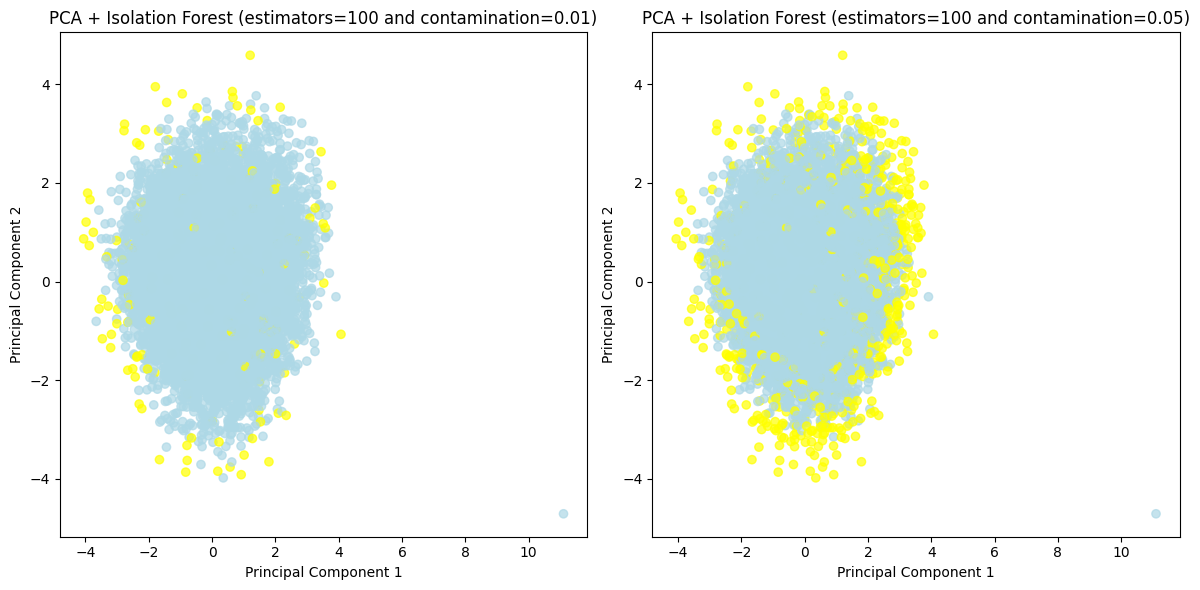

In [ ]:
#Visualisations with PCA + Isolation Forest

result_data = calculate_isolation_forest(100,0.01)
anomalies_iso_forest = result_data[0]
y_iso_forest_pred = result_data[1]

result_data = calculate_isolation_forest(100,0.05)
anomalies_iso_forest_1 = result_data[0]
y_iso_forest_pred_1 = result_data[1]

#Visualise the output in 2D after performing PCA
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

plot_df_2 = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
plot_df_2["anomaly"] = y_iso_forest_pred

axes[0].scatter(
    plot_df_2["PC1"], plot_df_2["PC2"],
    c=plot_df_2["anomaly"].map({1: "lightblue", -1: "yellow"}),  # blue=normal, red=anomaly
    alpha=0.7
)
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].set_title("PCA + Isolation Forest (estimators=100 and contamination=0.01)")

#Visualise the output in 2D after performing PCA
plot_df_3 = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
plot_df_3["anomaly"] = y_iso_forest_pred_1


axes[1].scatter(
    plot_df_3["PC1"], plot_df_1["PC2"],
    c=plot_df_3["anomaly"].map({1: "lightblue", -1: "yellow"}),  # blue=normal, yellow=anomaly
    alpha=0.7
)
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")
axes[1].set_title("PCA + Isolation Forest (estimators=100 and contamination=0.05)")

plt.tight_layout()
plt.show()

**Thoughts & Observations**: Applying Isolation Forest method as third approach to anomaly detection and testing different combinations of n_estimators and contamination values indicated increasing number of estimators does not significantly affect detection performance. Also the results show that **anomaly count scales directly with the contamination parameter**, confirming contamination is the primary driver of anomaly detection in Isolation Forest.

Comparing scatter plots for contamination 0.01 and 0.05 shows a **visually distinct difference in the number of anomalies detected**.

In [ ]:
#Overlapping between the different statistical and machine learning models to see the effectiveness of the techniques

overlap = anomalies.index.intersection(anomalies_svm.index)
iqr_anomaly_count = anomalies.shape[0]
one_class_svm_anomaly_count = anomalies_svm.shape[0]
iqr_svm_overlap_count = overlap.shape[0]
console.print("IQR(", iqr_anomaly_count ,") vs One Class SVM(", one_class_svm_anomaly_count, ") Overlap Count: ",iqr_svm_overlap_count, style="bold")

overlap = anomalies.index.intersection(anomalies_iso_forest_1.index)
iqr_anomaly_count = anomalies.shape[0]
isolation_forest_anomaly_count = anomalies_iso_forest_1.shape[0]
iqr_iso_forest_overlap_count = overlap.shape[0]
console.print("IQR(", iqr_anomaly_count ,") vs Isolation Forest(", isolation_forest_anomaly_count, ") Overlap Count: ",iqr_iso_forest_overlap_count, style="bold")

overlap = anomalies_svm.index.intersection(anomalies_iso_forest_1.index)
one_class_svm_anomaly_count = anomalies_svm.shape[0]
isolation_forest_anomaly_count = anomalies_iso_forest_1.shape[0]
isolation_forest_svm_overlap_count = overlap.shape[0]
console.print("One Class SVM(", one_class_svm_anomaly_count ,") vs Isolation Forest(", isolation_forest_anomaly_count, ") Overlap Count: ",isolation_forest_svm_overlap_count, style="bold")


IQR( 422 ) vs One Class SVM( 978 ) Overlap Count:  233

IQR( 422 ) vs Isolation Forest( 977 ) Overlap Count:  270

One Class SVM( 978 ) vs Isolation Forest( 977 ) Overlap Count:  639

**Which method produced best results and why**:
- Roughly **55**% of **IQR** anomalies are also flagged by **One-Class SVM**.
- Around **75**% of **IQR** anomalies are also identified by **Isolation Forest**
- Around **63**% of anomalies agree between the **two ML-based methods**, but both still flag a substantial number of different anomalies.
- The overlap counts highlight that **no single method is perfect**, but overlapping anomalies across different methods are highly likely to be true positives.
- Also the machine learning method capture a similar **broad anomaly space**.

### Reference:
Devabrat, M., 2022. Predictive Maintenance on Ship's Main Engine using AI. Available at: https://dx.doi.org/10.21227/g3za-v415. [Accessed 5 March 2024]